# Week 5

Modern Portfolio Theory

In [89]:
import pandas as pd
import numpy as np

Read in the data:

In [2]:
df = pd.read_csv('HDFC.csv')
df = df[df['Series'] == 'EQ']

In [3]:
df.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty'],
      dtype='object')

Calculate mean returns and volatility

In [4]:
Mean_daily_return = (df['Close Price'].pct_change()).mean()
Std_daily_return = (df['Close Price'].pct_change()).std()
Mean_daily_return

0.0005474025881947133

In [5]:
Annualized_daily_return = (1+(Mean_daily_return))**252 - 1
print(f'Annualized daily return of HDFC stock: {Annualized_daily_return*100:.2f}%')

Annualized daily return of HDFC stock: 14.79%


In [6]:
Annualized_volatility = Std_daily_return*(252**0.5)
print(f'Volatility of HDFC stock: {Annualized_volatility*100:.2f}%')

Volatility of HDFC stock: 21.46%


Create a Random Portfolio:

In [7]:
from glob import glob
portfolio_crafted = [pd.read_csv(filename) for filename in np.random.choice(glob('./*_Cap/*.csv'), 
                                                                           5, 
                                                                           replace = False)]

In [8]:
prices = [stock[stock['Series'] == 'EQ']['Close Price'].rename(stock['Symbol'].iloc[0]) 
          for stock in portfolio_crafted] 
prices = pd.concat(prices, axis = 1)
prices.dropna(inplace = True)

Calculate Sharpe Ratios for different weights and plot:

In [9]:
def sharpe_ratio(prices, weights):
    asset_returns = prices.pct_change().dropna()
    portfolio_returns = asset_returns.dot(weights).mean()
    portfolio_volatility = asset_returns.dot(weights).std()
    return (portfolio_returns*np.sqrt(252)/portfolio_volatility, portfolio_returns*100, portfolio_volatility*100)

In [82]:
weights = np.random.randint(0,1000,20000).reshape((4000, 5))
weights = weights/np.vstack([weights.sum(axis = 1) for _ in range(5)]).T
weights = np.round(weights, 2).T

In [83]:
sharpe_ratios, returns, volatilities = sharpe_ratio(prices, weights)

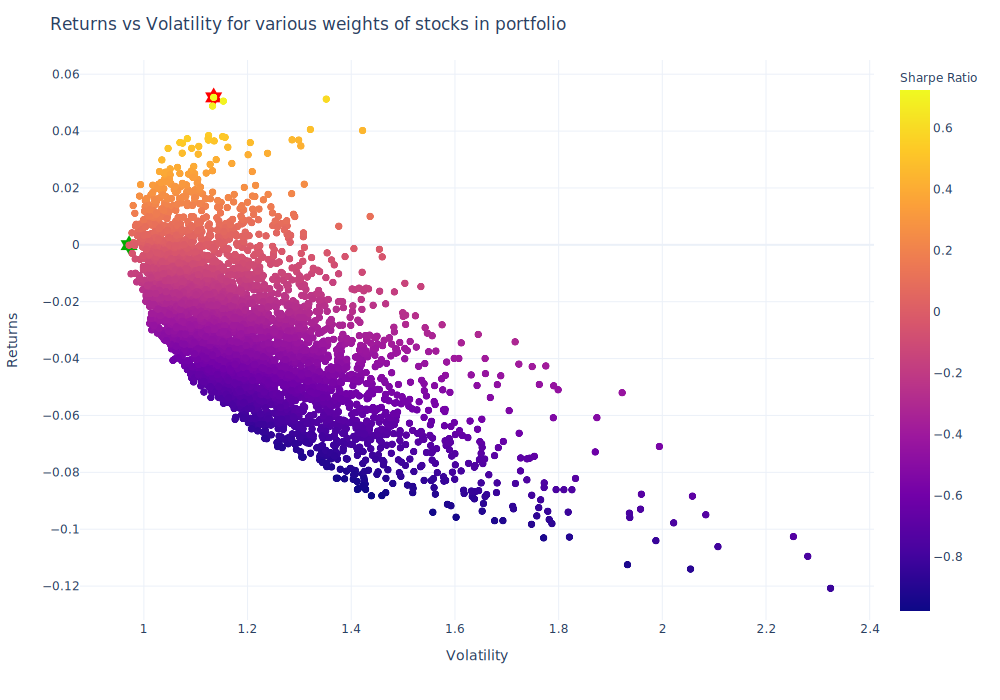

In [93]:
import plotly.express as px
import plotly.graph_objects as go
highest_sharpe = sharpe_ratios.argmax()
fig = px.scatter(x = volatilities, y = returns, color = sharpe_ratios)
fig.update_layout(dict(template = 'plotly_white', 
                       title = 'Returns vs Volatility for various weights of stocks in portfolio', 
                       xaxis = dict(title = 'Volatility'), 
                       yaxis = dict(title = 'Returns'), 
                       coloraxis = dict(colorbar = dict(title_text = 'Sharpe Ratio'))))
fig.add_trace(go.Scatter(dict(marker_symbol = 'hexagram',
                              marker = dict(size = 15, color = '#f00'),
                              x = [volatilities[highest_sharpe]],
                              y = [returns[highest_sharpe]], 
                              showlegend = False, 
                              name = 'Highest Sharpe Ratio')))
fig.add_trace(go.Scatter(dict(marker_symbol = 'hexagram',
                              marker = dict(size = 15, color = '#00aa00'),
                              x = [volatilities.min()],
                              y = [returns[volatilities.argmin()]], 
                              showlegend = False, 
                              name = 'Lowest Volatility')))
fig.show('svg', width = 1000, height = 700)